In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [44]:
data_file = '..\\Data\\icouk_sighting_data_with_params.csv'
data = pd.read_csv(data_file)

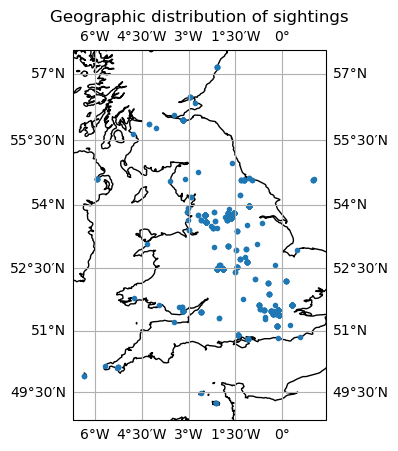

In [65]:
x = data["Longitude"]
y= data["Latitude"]

crs = ccrs.Miller()
ax = plt.axes(projection=crs)
ax.coastlines()
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
ax.plot(x,y,".",transform=ccrs.PlateCarree())
ax.set_title("Geographic distribution of sightings")
plt.show()

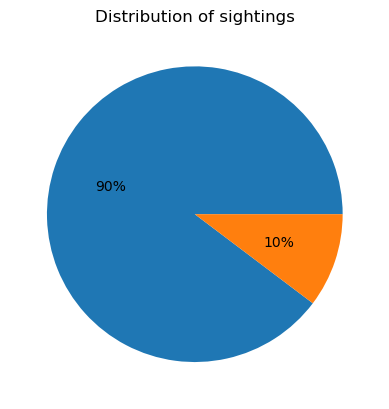

In [66]:
pies = data.Seen.str.get_dummies().sum()
plt.pie(pies, autopct='%1.0f%%')
plt.title('Distribution of sightings')
plt.show()

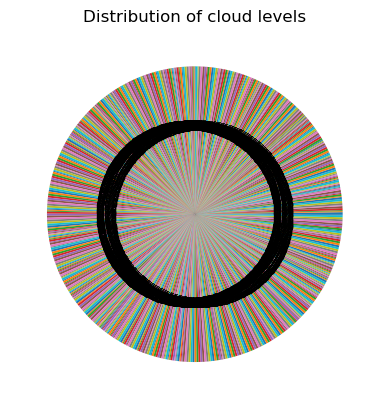

In [70]:
pies = data["Cloud Level"] #.str.get_dummies().sum()
plt.pie(pies, autopct='%1.0f%%')
plt.title('Distribution of cloud levels')
plt.show()